
**Paridhi Bhardwaj, CS370:- ASSIGNMENT 1B **

Optimization algorithms for linear regression
Task 1: Stochastic Gradient Descent


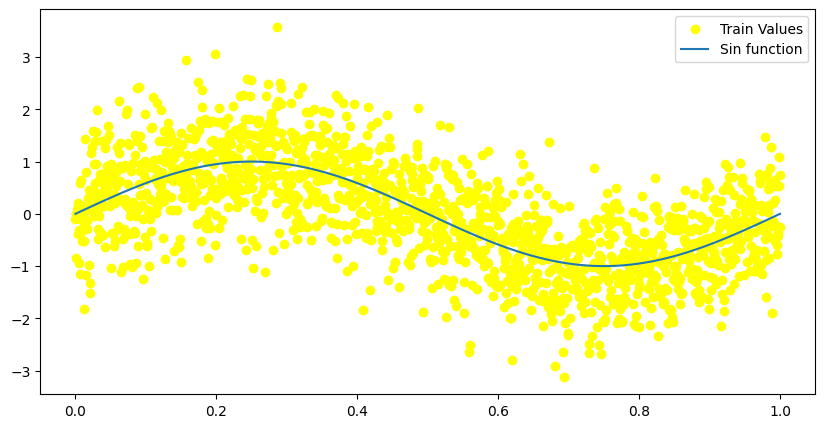

Epoch 0, Loss: 5.464286804199219
Epoch 1750, Loss: 0.552760124206543
Epoch 3500, Loss: 0.5363898277282715
Epoch 5250, Loss: 0.5324708819389343
Epoch 7000, Loss: 0.5310640335083008
Epoch 8750, Loss: 0.5302149057388306


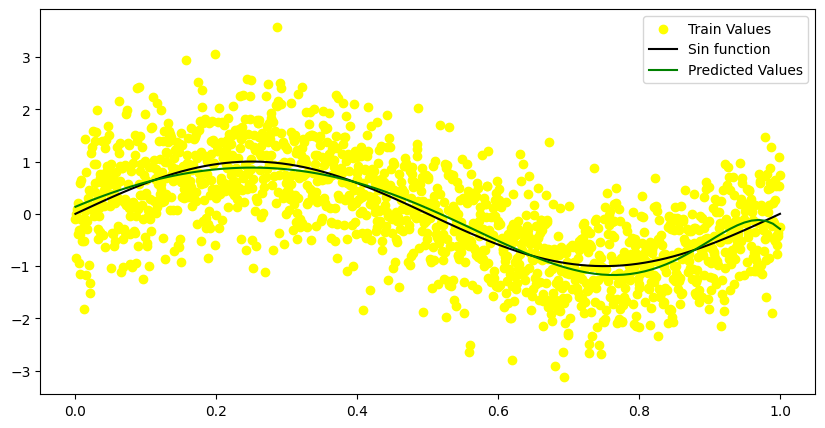

In [3]:
import torch
import matplotlib.pyplot as plt

#professor gave
def sinusoidal(x):
    return torch.sin(2 * torch.pi * x)

#polynomial function
degree = 15
def poly(x, degree):
    return torch.stack([x**i for i in range(degree + 1)], dim=1)


#creates sample data
def sam_data(size, range=[0, 1], std=0.75):
    x = torch.linspace(range[0], range[1], size)
    y = sinusoidal(x) + torch.normal(mean=0, std=std, size=x.shape)
    return x, y

#variables
train_x, train_y = sam_data(1550, std=0.75)
test_x = torch.linspace(0, 1, 100)
test_y = sinusoidal(test_x)


#draw the first graph
plt.figure(figsize=[10, 5])
plt.scatter(train_x, train_y, color='yellow', label='Train Values')
plt.plot(test_x, test_y, label='Sin function')
plt.legend()
plt.show()


#hyperparameters that use in formula
l = 0.0000000001
learning_rate = 0.45
epochs = 10000



TrainPoly_X = poly(train_x, degree)
TestPoly_X = poly(test_x, degree)
weights = torch.rand(degree+1, requires_grad=True)

#lossfun
def lossFun(X, y, weights, l):
  pred_y = X @ weights
  lossMSE = torch.mean((pred_y - y)**2)
  l2 = l*torch.mean(weights**2)
  loss = lossMSE + l2
  return loss

#keeps track of the losses
count=[]

optimizer = torch.optim.SGD([weights], lr=learning_rate)

for epoch in range(epochs):
  optimizer.zero_grad()
  loss = lossFun(TrainPoly_X, train_y, weights, l)
  loss.backward()
  optimizer.step()
  torch.nn.utils.clip_grad_norm_([weights], max_norm=1.0)

#interval
  if epoch % 1750 == 0:
     print(f"Epoch {epoch}, Loss: {loss.item()}")
  count.append(loss.item())


y_pred = TestPoly_X @ weights.detach()

#final plots
plt.figure(figsize=[10, 5])
plt.scatter(train_x, train_y, color='yellow', label='Train Values')  # Use train_y here
plt.plot(test_x, test_y, color= 'black', label='Sin function')
plt.plot(test_x, y_pred, color='green', label='Predicted Values')
plt.legend()
plt.show()